In [1]:
import pandas as pd
df = pd.read_parquet("../parquets/corrected_clean_detection_results_debug_images.parquet")

In [2]:
df

,filename,col_x,row_y,width,height,label
0,../debug_images/0000862a233105cc.jpg,316.5,447.0,155,118,person
1,../debug_images/002e555bd63acb71.jpg,696.0,347.0,648,670,person
2,../debug_images/002e555bd63acb71.jpg,166.5,624.0,141,112,person
3,../debug_images/002e555bd63acb71.jpg,66.5,599.5,129,163,person
4,../debug_images/002e555bd63acb71.jpg,289.0,590.5,122,183,person
...,...,...,...,...,...,...
1026,../debug_images/0bf36835f38ef50b.jpg,460.0,159.0,54,82,person
1027,../debug_images/0bf36835f38ef50b.jpg,388.0,168.5,64,89,person
1028,../debug_images/00d458259fe8a694.jpg,686.5,391.5,129,133,person
1029,../debug_images/06eb8da7ead1ca12.jpg,446.5,304.0,81,70,face


In [3]:
df.dropna(inplace=True) # Visualize outliers. Outliers row has a outliers_distance score. The rest are NaN.
df

,filename,col_x,row_y,width,height,label
0,../debug_images/0000862a233105cc.jpg,316.5,447.0,155,118,person
1,../debug_images/002e555bd63acb71.jpg,696.0,347.0,648,670,person
2,../debug_images/002e555bd63acb71.jpg,166.5,624.0,141,112,person
3,../debug_images/002e555bd63acb71.jpg,66.5,599.5,129,163,person
4,../debug_images/002e555bd63acb71.jpg,289.0,590.5,122,183,person
...,...,...,...,...,...,...
1026,../debug_images/0bf36835f38ef50b.jpg,460.0,159.0,54,82,person
1027,../debug_images/0bf36835f38ef50b.jpg,388.0,168.5,64,89,person
1028,../debug_images/00d458259fe8a694.jpg,686.5,391.5,129,133,person
1029,../debug_images/06eb8da7ead1ca12.jpg,446.5,304.0,81,70,face


In [4]:
# # Convert cxcywh to xyxy
# df['x1'] = df['col_x'] - df['width'] / 2
# df['y1'] = df['row_y'] - df['height'] / 2
# df['x2'] = df['col_x'] + df['width'] / 2
# df['y2'] = df['row_y'] + df['height'] / 2

# df = df[['score', 'x1', 'y1', 'x2', 'y2', 'label', 'filename', 'outlier_distance']]

In [5]:
grouped_df = df.groupby('filename')

In [6]:
agg_df = grouped_df.agg(lambda x: list(x))
# agg_df.sort_values(by='outlier_distance', ascending=True, inplace=True)
agg_df = agg_df.reset_index()

In [7]:
agg_df

,filename,col_x,row_y,width,height,label
0,../debug_images/0000862a233105cc.jpg,[316.5],[447.0],[155],[118],[person]
1,../debug_images/002e555bd63acb71.jpg,"[696.0, 166.5, 66.5, 289.0, 384.5, 958.5, 371....","[347.0, 624.0, 599.5, 590.5, 593.0, 180.0, 423...","[648, 141, 129, 122, 115, 129, 67, 99, 69, 59,...","[670, 112, 163, 183, 176, 358, 77, 167, 97, 69...","[person, person, person, person, person, perso..."
2,../debug_images/002fbe9a57148479.jpg,"[508.5, 838.0]","[345.0, 342.5]","[1017, 372]","[666, 679]","[person, person]"
3,../debug_images/00591a9891b2e5fa.jpg,"[342.5, 669.5, 132.0, 221.5, 227.5, 349.5]","[418.0, 496.0, 295.0, 341.0, 293.0, 204.5]","[431, 265, 98, 121, 45, 59]","[530, 372, 86, 152, 40, 65]","[person, person, person, person, face, face]"
4,../debug_images/005caa1d3d7c6864.jpg,"[503.5, 728.0, 920.5, 260.5, 168.5, 356.5, 72....","[496.5, 530.5, 557.0, 429.5, 431.5, 437.0, 414...","[329, 282, 193, 73, 79, 75, 67, 73, 61, 65, 50...","[543, 475, 422, 125, 131, 106, 95, 130, 81, 12...","[person, person, person, person, person, perso..."
...,...,...,...,...,...,...
225,../debug_images/1388631da656924b.jpg,"[778.5, 355.5, 64.5, 459.5, 856.5, 295.0]","[367.5, 390.0, 213.5, 364.0, 327.5, 163.0]","[491, 617, 129, 263, 267, 136]","[617, 572, 405, 264, 285, 134]","[person, person, person, face, face, face]"
226,../debug_images/138c4698f334e5ff.jpg,[529.5],[396.0],[989],[570],[person]
227,../debug_images/13a887093768b5ec.jpg,[495.5],[440.5],[245],[209],[person]
228,../debug_images/13c67cdd79ab35f0.jpg,"[450.5, 601.5]","[271.5, 354.5]","[275, 279]","[157, 149]","[person, person]"


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def generate_colormap(labels, hue_start=0.1, hue_end=0.9, saturation=0.9, value=0.8):
    """
    Generate a colormap for a set of unique labels while avoiding bright colors.

    Parameters:
        labels (iterable): An iterable object containing labels.
        hue_start (float): The start value of the hue range in HSV space.
        hue_end (float): The end value of the hue range in HSV space.
        saturation (float): Saturation level to set for the colors.
        value (float): Brightness level to set for the colors.

    Returns:
        dict: A dictionary mapping labels to colors in RGB format.
    """
    try:
        from matplotlib.colors import hsv_to_rgb
    except:
        print("matplotlib dependency is needed please install using pip3 install matplotlib")
        raise

    unique_labels = set(labels)
    n_labels = len(unique_labels)

    # Define ranges for Hue
    hue_range = np.linspace(hue_start, hue_end, n_labels)

    # Create colormap in HSV and then convert to RGB
    colormap_hsv = np.zeros((n_labels, 3))
    colormap_hsv[:, 0] = hue_range
    colormap_hsv[:, 1] = saturation
    colormap_hsv[:, 2] = value
    colormap = [hsv_to_rgb(color) for color in colormap_hsv]

    # Create a label to color mapping
    label_to_color = {label: colormap[i] for i, label in enumerate(unique_labels)}

    return label_to_color
    
def annotate_image(ax, img, annotations):
    ax.imshow(img)
    label_to_color = generate_colormap(annotations["labels"])

    for label, box in zip(annotations["labels"], annotations["boxes"]):
        cx, cy, w, h = box
        color = label_to_color.get(label, (0, 0, 0, 1))  # Fallback color is black

        x = cx - w / 2
        y = cy - h / 2

        rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor=color, facecolor="none")
        ax.add_patch(rect)
        ax.text(x, y, f"{label}", fontsize=10, color="white",
                bbox=dict(facecolor=color, edgecolor=color, boxstyle="round,pad=0.5"))

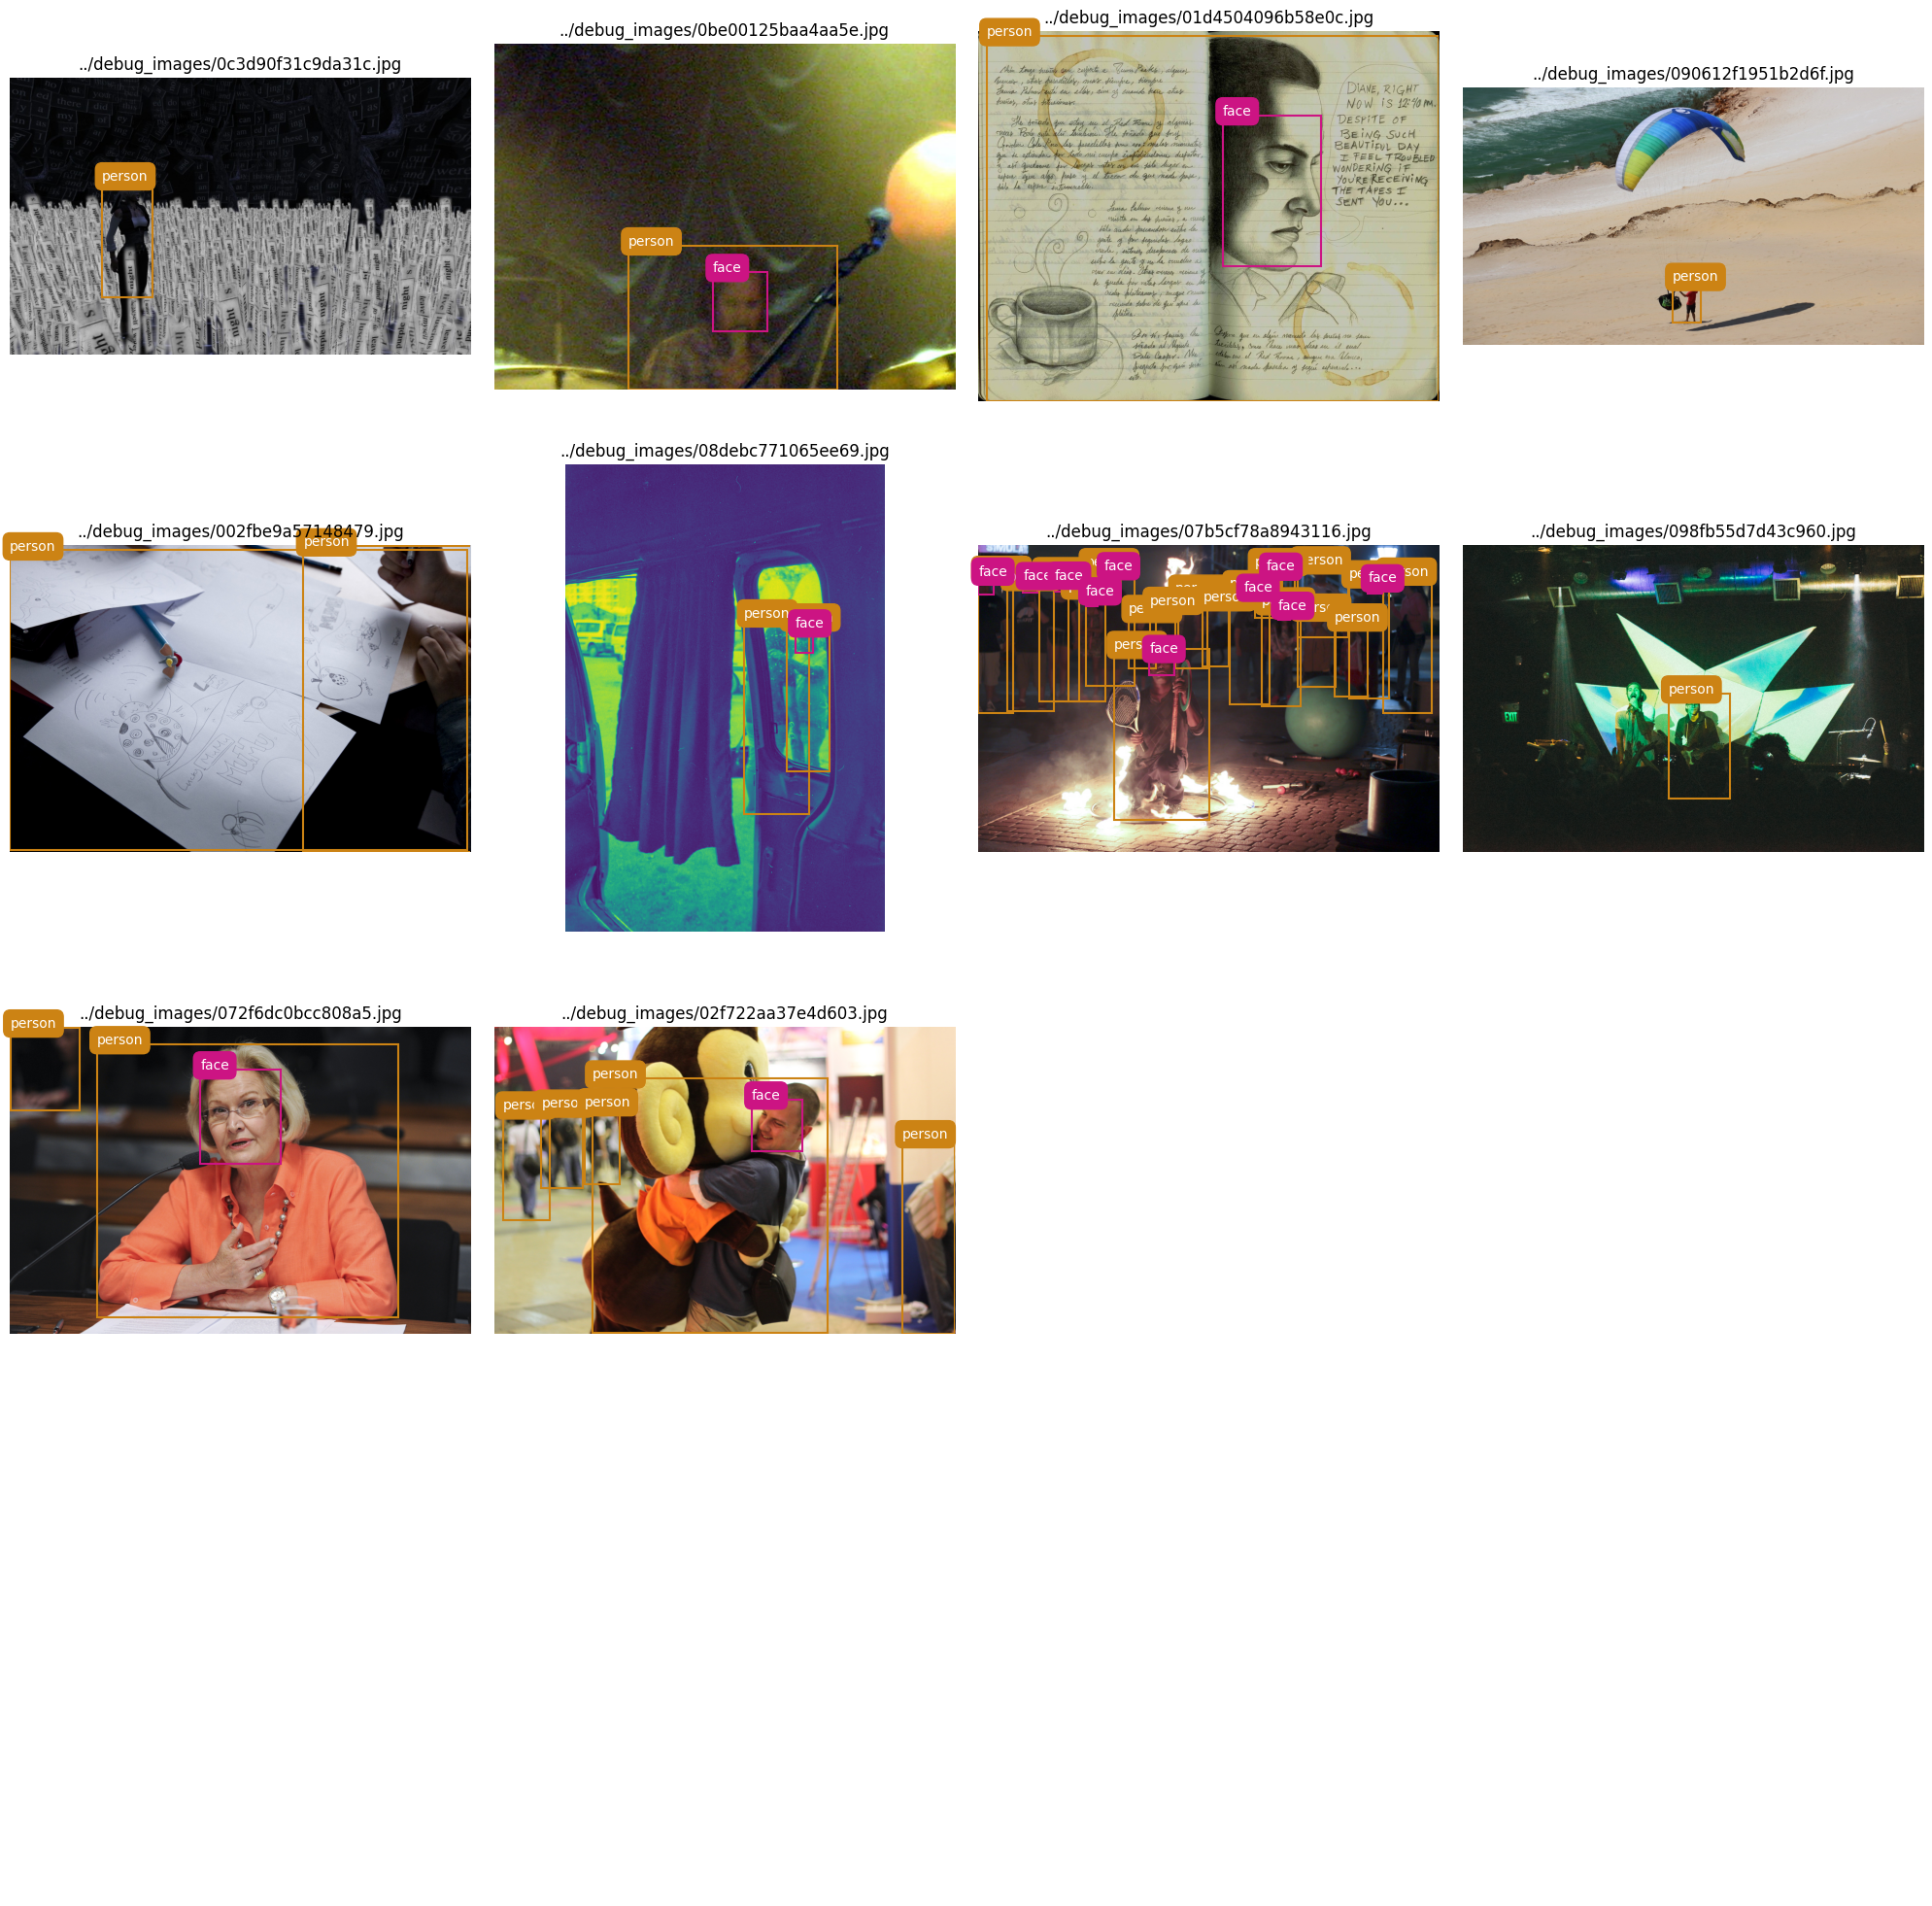

In [19]:
NUM_IMAGES = 10
sampled_df = agg_df.sample(NUM_IMAGES) 

# Calculate grid size
n_images = len(sampled_df)
grid_size = int(n_images**0.5) + 1  # Simple way to determine grid size

# Create figure and axes
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))

axes = axes.flatten()  # Flatten to easily iterate over

for ax, (index, row) in zip(axes, sampled_df.iterrows()):
    filename = row['filename']
    img = plt.imread(filename)  # Assuming plt is imported from matplotlib
    annotations = {
        'labels': row['label'],
        # 'scores': row['score'],
        # 'outlier_distance': row['outlier_distance'],
        'boxes': list(zip(row['col_x'], row['row_y'], row['width'], row['height']))
    }
    
    annotate_image(ax, img, annotations)
    ax.set_title(filename)
    ax.axis('off')  # Hide axis

# Hide any unused subplots
for ax in axes[len(sampled_df):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()